# Play With Iris Flower DataSet

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the Iris Flower Dataset from the inbuilt Datasets in sklearn.DataSets
from sklearn.datasets import load_iris

In [22]:
# Now we find the discription of the data set i.e. what are the info contains this data set
dir(load_iris())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [23]:
# Finding What are the features of this given DataSet

load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
# Here are the names of the target i.e Output Names  "target" only represnts the numeric no. 
# corresponding to the name of target_names i.e 0-->setosa ,1-->versicolor ,2-->virginica

load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [25]:
# Checking the type of the data 
type(load_iris().data)

numpy.ndarray

In [26]:
# Now convert the Given Data into the DataFrame using Pandas for visualize it
# Now we create a DataFrame of this data by--> pd.DataFrame(data,columns)  
# Here data is of numpy.ndarray type & columns are the Features of the DataSet

df = pd.DataFrame(load_iris().data , columns = load_iris().feature_names)

In [27]:
# Now we add an addational column "label" in the DataFrame which represent the result 
#i.e Output Y     &  Output is also given in the DataSet  

df["label"] = load_iris().target

### DataFrame--> Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous 
### tabular data structure with labeled axes (rows and columns). A Data frame is a two-
### dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

In [28]:
# Here is our created data frame
df.head() #It will display the top elements of the DataFrame df here default value of head is 5

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Now we plot some of the graphs for visulaizing the dataset

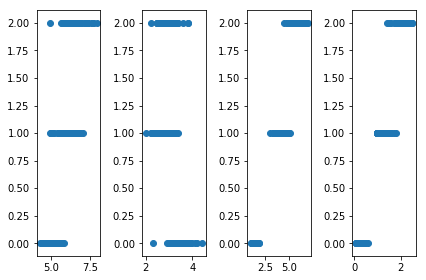

In [67]:
# Now we draw scatter plot of all the features with the label
# & we find that it a kind of classification problem 

fig,ax = plt.subplots(nrows=1,ncols=4)  # It will return fig & axes i.e we can plot 4 subplots 
# in 1 plot by using ncols = 4

fig.tight_layout()
ax[0].scatter(df['sepal length (cm)'],df['label']) # Plot sepal length with label in subplot1
ax[1].scatter(df['sepal width (cm)'],df['label'])  # Plot sepal width with label in subplot2
ax[2].scatter(df['petal length (cm)'],df['label']) # Plot petal length with label in subplot3
ax[3].scatter(df['petal width (cm)'],df['label'])  # Plot petal width with label in subplot4


## As the above plot shows that it is a classification problem so we can use any  
## classification model from:-->
### 1- Linear Classifiers: Logistic Regression, Naive Bayes Classifier.
### 2- Support Vector Machines.
### 3- Decision Trees.
### 4- Boosted Trees.
### 5- Random Forest.
### 6- Neural Networks.
### 7- Nearest Neighbor.

## We can choose any of them but for the checking of accuracy of all the models we take all of them and find the accuracy 

In [69]:
# For split dataset into train & test
from sklearn.model_selection import train_test_split

In [72]:
# Importing Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [73]:
# Import Accuracy Fxn for finding the accuracy of the model 
from sklearn.metrics import accuracy_score

In [74]:
# Creating Models Object
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Naive_Bayes   = GaussianNB()
Support_Vector_Machine = SVC()

In [76]:
# Now we take all the values of Features of dataset into x & all the value of output label 
# into y for the training & testing  purpose

x = df.iloc[:,:-1].values   # It contains all rows & "only 4" columns from df because last 
                            # column is output or lable column
y = df.iloc[:,-1].values    # It contains all rows & "last 5th" column from df


In [122]:
# Now we split DataSet into the training & testing sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state = 6)


In [123]:
len(x_train) == len(y_train)

True

In [124]:
len(x_test) == len(y_test)

True

In [125]:
# Now we fit data into the objects of the Models
Decision_Tree.fit(x_train,y_train)
Random_Forest.fit(x_train,y_train)
Naive_Bayes.fit(x_train,y_train)
Support_Vector_Machine.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
predDec= Decision_Tree.predict(x_test)
predRan= Random_Forest.predict(x_test)
predNai= Naive_Bayes.predict(x_test)
predSupp= Support_Vector_Machine.predict(x_test)

In [127]:
# Now we want to predict the value of 3rd element in the DataFrame using Random Forset Model

# It will Give the info about the 3rd element or 3rd row of the DataFrame df
df.iloc[3]

sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
label                0.0
Name: 3, dtype: float64

In [128]:
# We Only want top 4 elements values only beacuse the 5th one is the output of this input so

df.iloc[3][:-1]   # all rows except last one


sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
Name: 3, dtype: float64

In [129]:
# Now we want the values of these 4 features so
df.iloc[3][:-1].values


array([ 4.6,  3.1,  1.5,  0.2])

In [130]:
# take 3 column
pre2value = df.iloc[3][:-1].values.reshape(-1,4)

In [131]:
pre2value.shape

(1, 4)

In [132]:
# Now we predict the value of the 3rd element of the dataframe or dataset
Random_Forest.predict(pre2value)#or  Random_Forest.predict(df.iloc[3][:-1].values.reshape(-1,4))

# so we get the '0' as output i.e it represent the label '0' which is corresponding to 'setosa'
# flower

array([0])

In [133]:
# Now we Check the accurcy of all the models

print("The accuracy score of Decision Tree is {} %".format(accuracy_score(y_test,predDec)*100))
print("The accuracy score of Random Forest is {} %".format(accuracy_score(y_test,predRan)*100))
print("The accuracy score of Support Vector Machine is {} %".format(accuracy_score(y_test,predSupp)*100))
print("The accuracy score of Multinomial Navie Bayes is {} %".format(accuracy_score(y_test,predNai)*100))

The accuracy score of Decision Tree is 94.73684210526315 %
The accuracy score of Random Forest is 92.10526315789474 %
The accuracy score of Support Vector Machine is 97.36842105263158 %
The accuracy score of Multinomial Navie Bayes is 92.10526315789474 %


# Some Plots for visulation of the dataset

Text(0,0.5,'label')

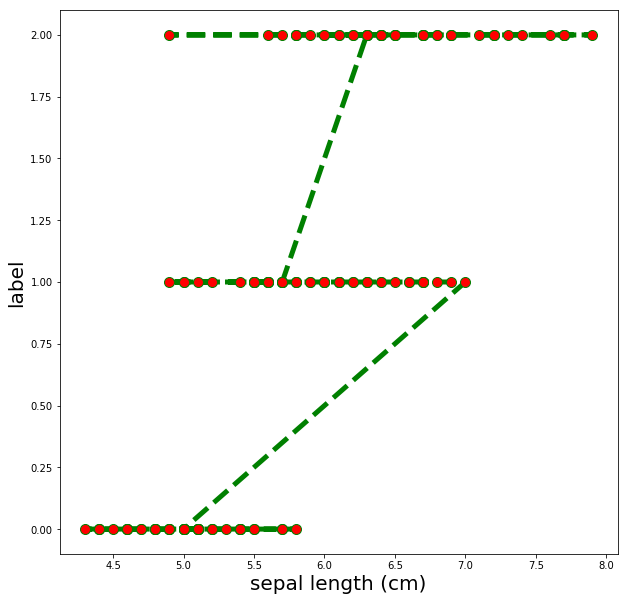

In [65]:
# Ploting Lined Graph B/W "sepal length" & "label"

plt.figure(figsize = (10,10))  # Zoom the figure
plt.plot(df["sepal length (cm)"],df["label"],color= 'green',linestyle='dashed' ,linewidth=5, marker = 'o' ,markerfacecolor= 'red', markersize= 10)
plt.xlabel("sepal length (cm)" , fontsize=20)
plt.ylabel("label" , fontsize=20)

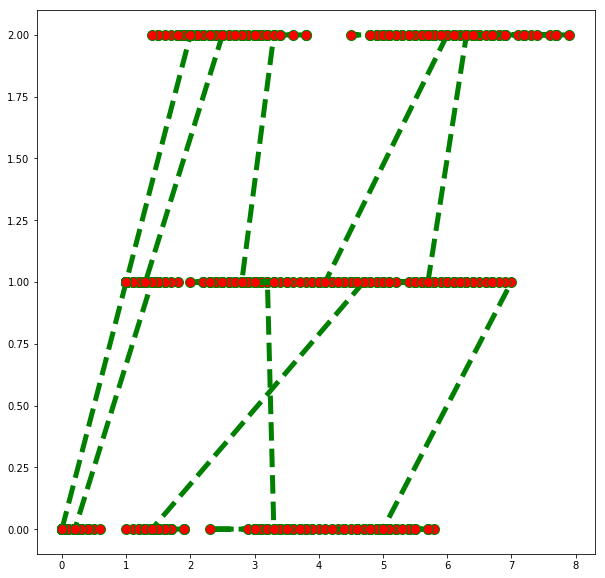

In [66]:
plt.figure(figsize=(10,10))
plt.plot(df,df.label, color='green' , linestyle= 'dashed', linewidth=5, marker='o' ,markerfacecolor='red' ,markersize=10)

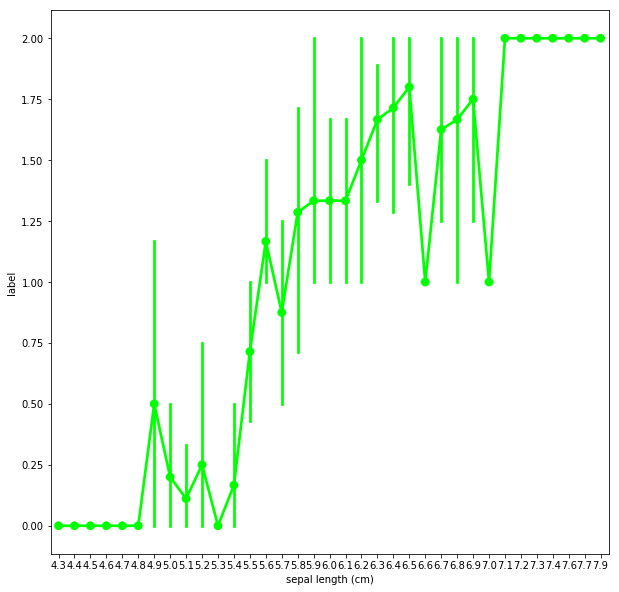

In [58]:
# Point Plot of "sepal length (cm)" & label

import seaborn as sns
plt.figure(figsize=(10,10))
sns.pointplot(x=df["sepal length (cm)"],y=df.label,color='lime')

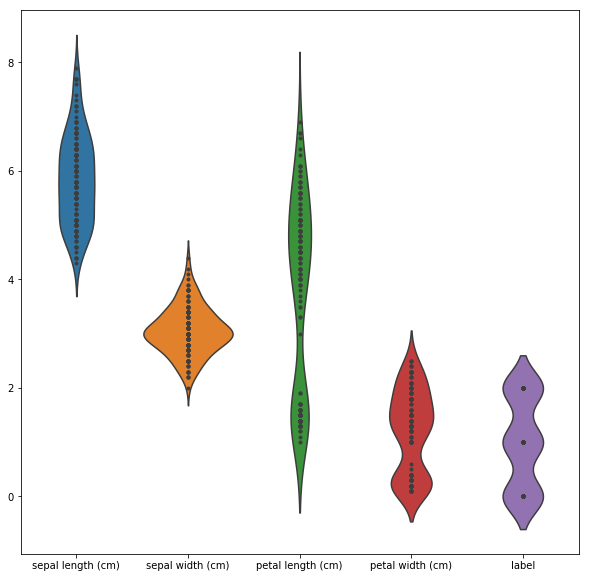

In [64]:
# Violinplot of the DataSet
plt.figure(figsize= (10,10))
sns.violinplot(data=df , inner = 'points')
plt.show()